In [13]:
import numpy as np
from qiskit import QuantumCircuit

In [14]:
# Создаем квантовую схему с помощью конструктора `QuantumCircuit`.
qc_example = QuantumCircuit(3)
qc_example.h(0)          # generate superposition
qc_example.p(np.pi/2,0)  # add quantum phase
qc_example.cx(0,1)       # 0th-qubit-Controlled-NOT gate on 1st qubit
qc_example.cx(0,2)       # 0th-qubit-Controlled-NOT gate on 2nd qubit

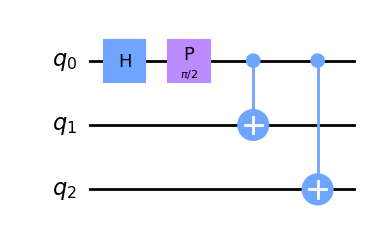

In [15]:
# Отображаем квантовую схему в виде диаграммы.
qc_example.draw("mpl")

In [16]:
# Запускаем схему с помощью `Sampler` и замеряем результаты.
qc_measured = qc_example.measure_all(inplace=False)

from qiskit.primitives.sampler import Sampler
sampler = Sampler()
job = sampler.run(qc_measured, shots=1000)
result = job.result()
print(f" > Квазивероятностное распределение: {result.quasi_dists}")

 > Квазивероятностное распределение: [{0: 0.498, 7: 0.502}]


In [17]:
# Применяем оператор к выходным значениям.
from qiskit.quantum_info import SparsePauliOp
operator = SparsePauliOp.from_list([("XXY", 1), ("XYX", 1), ("YXX", 1), ("YYY", -1)])

# Выполним с использованием примитива оценщика
from qiskit.primitives import Estimator
estimator = Estimator()
job = estimator.run(qc_example, operator, shots=1000)
result = job.result()
print(f" > Ожидаемое значение: {result.values}")


 > Ожидаемое значение: [4.]
